# TBV Outputs analyser
Let's compare the feedback provided during the active and sham runs of the experiment.

In [1]:
# Imports
import os
import numpy as np
import pandas as pd

from src.my_settings import settings
sett = settings()

from src.utils import parse_prt_file

In [2]:
# Folder with the npz files
npy_path = os.path.join(sett["bids_path"], 'derivatives', 'tbv-script-outs')

# Get all the npz files
npy_files = [f for f in os.listdir(npy_path) if f.endswith('.npz') and f.startswith('sub-')]

# Sort the files
npy_files.sort()

print(f'Found {len(npy_files)} npz files.')

Found 88 npz files.


# Protocol

In [3]:
# Read PRT file
prtPath = os.path.join(sett["git_path"],'data','prt','MusicNF_Main_v0.3_PostDiscard.prt')
conditions, cond_names = parse_prt_file(prtPath)

# delete first row of condition['Rest']
conditions['Rest'] = np.delete(conditions['Rest'], 0, 0)

In [4]:
indexes_rest = [np.arange(i[0], i[1]+1) for i in conditions['Rest']]
indexes_rest

[array([41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,
        58, 59, 60]),
 array([ 81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
         94,  95,  96,  97,  98,  99, 100]),
 array([121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
        134, 135, 136, 137, 138, 139, 140]),
 array([161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173,
        174, 175, 176, 177, 178, 179, 180]),
 array([201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213,
        214, 215, 216, 217, 218, 219, 220])]

In [5]:
indexes_mi = [np.arange(i[0], i[1]+1) for i in conditions['MotorImagery']]
indexes_mi

[array([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
        38, 39, 40]),
 array([61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
        78, 79, 80]),
 array([101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
        114, 115, 116, 117, 118, 119, 120]),
 array([141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
        154, 155, 156, 157, 158, 159, 160]),
 array([181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193,
        194, 195, 196, 197, 198, 199, 200]),
 array([221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233,
        234, 235, 236, 237, 238, 239, 240])]

# Iteration

In [6]:
# Initalize the data frame
df = pd.DataFrame(columns=['sub', 'feedback', 'correlation_tc', 'correlation_mean'])

# Loop through all the files
for npy_file in npy_files:

    # Get the subject number
    sub = npy_file.split('_')[0]

    # Get the feedback type
    feedback = npy_file.split('_')[2].lower()

    # Load the file
    data = np.load(os.path.join(npy_path, npy_file))

    pc = data['PearsonCorr']

    # delete all numbers above 1 and below -1 (invalid values due to window)
    pc[pc > 1] = np.nan
    pc[pc < -1] = np.nan

    # fisher transform
    pc = np.arctanh(pc)

    # Get the correlations values for the Motor Imagery per trial and add to the data frame
    for ii in range(len(indexes_mi)):
        pc_mi = pc[indexes_mi[ii]]
        
        df = pd.concat(
            [df, pd.DataFrame(
                [[sub, feedback, pc_mi, np.nanmean(pc_mi)]],
                  columns=df.columns)])
    
    # Get the correlations values for the Rest per trial and add to the data frame
    for ii in range(len(indexes_rest)):
        pc_rest = pc[indexes_rest[ii]]
        
        df = pd.concat(
            [df, pd.DataFrame(
                [[sub, 'rest', pc_rest, np.nanmean(pc_rest)]],
                  columns=df.columns)])


/var/folders/nd/bgqkn02j7sl982jdtqhts9z00000gn/T/ipykernel_82152/1804577833.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(


In [7]:
df

,sub,feedback,correlation_tc,correlation_mean
0,sub-01,active,"[[0.8834017165931979], [0.5936351046975646], [...",1.116329
0,sub-01,active,"[[0.639477209433777], [0.25846493532013015], [...",0.296745
0,sub-01,active,"[[0.6386867596114921], [0.16471422982690861], ...",1.095132
0,sub-01,active,"[[0.32111039996360463], [0.301462958566049], [...",1.095647
0,sub-01,active,"[[1.6171461589082468], [1.7078990542699366], [...",0.970115
...,...,...,...,...
0,sub-22,rest,"[[1.1374085269142709], [0.9918071937144581], [...",1.308896
0,sub-22,rest,"[[1.3642629353359232], [1.2748679464285693], [...",1.870020
0,sub-22,rest,"[[1.7174490992780895], [1.457468820282638], [0...",1.601348
0,sub-22,rest,"[[1.0275823335920613], [1.225648824675699], [1...",1.142314


# Plots

np.float64(1.7597425747262645)

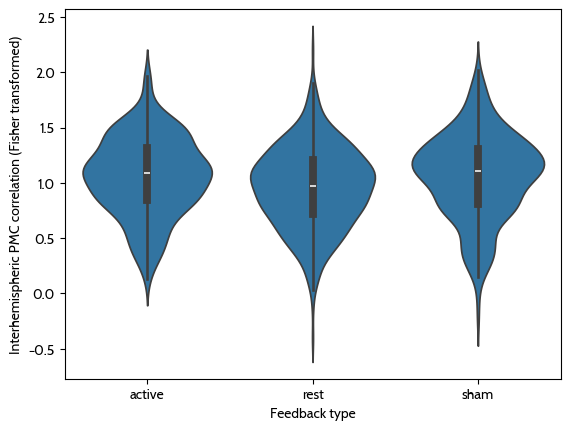

In [8]:
# draw a violin plot comparing the correlation for the two feedback types
import seaborn as sns
import matplotlib.pyplot as plt

sns.violinplot(x='feedback', y='correlation_mean', data=df)
plt.ylabel('Interhemispheric PMC correlation (Fisher transformed)')
plt.xlabel('Feedback type')

# color the two violins differently
# colors = ['#0A5F83', '#918E89']
# for i, violin in enumerate(plt.gca().collections):
#     violin.set_facecolor(colors[i])
# plt.show()

# test for statistical difference between the means

fb1 = df[df['feedback'] == 'active']['correlation_mean']
fb2 = df[df['feedback'] == 'sham']['correlation_mean']

from scipy.stats import ttest_ind

ttest_ind(fb1, fb2, nan_policy='omit')[1] * 2



TtestResult(statistic=np.float64(-0.06186381191157061), pvalue=np.float64(0.9509647532214648), df=np.float64(42.0))

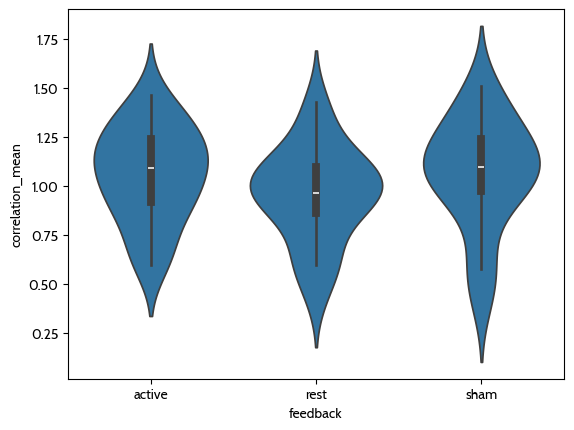

In [9]:
# Perform an average per participant for each feedback type and then test for statistical difference
df_avg = df.groupby(['sub', 'feedback']).mean().reset_index()

sns.violinplot(x='feedback', y='correlation_mean', data=df_avg)

# colors = ['#0A5F83', '#918E89']
# for i, violin in enumerate(plt.gca().collections):
#     violin.set_facecolor(colors[i])
# plt.show()

fb1 = df_avg[df_avg['feedback'] == 'active']['correlation_mean']
fb2 = df_avg[df_avg['feedback'] == 'sham']['correlation_mean']

ttest_ind(fb1, fb2)


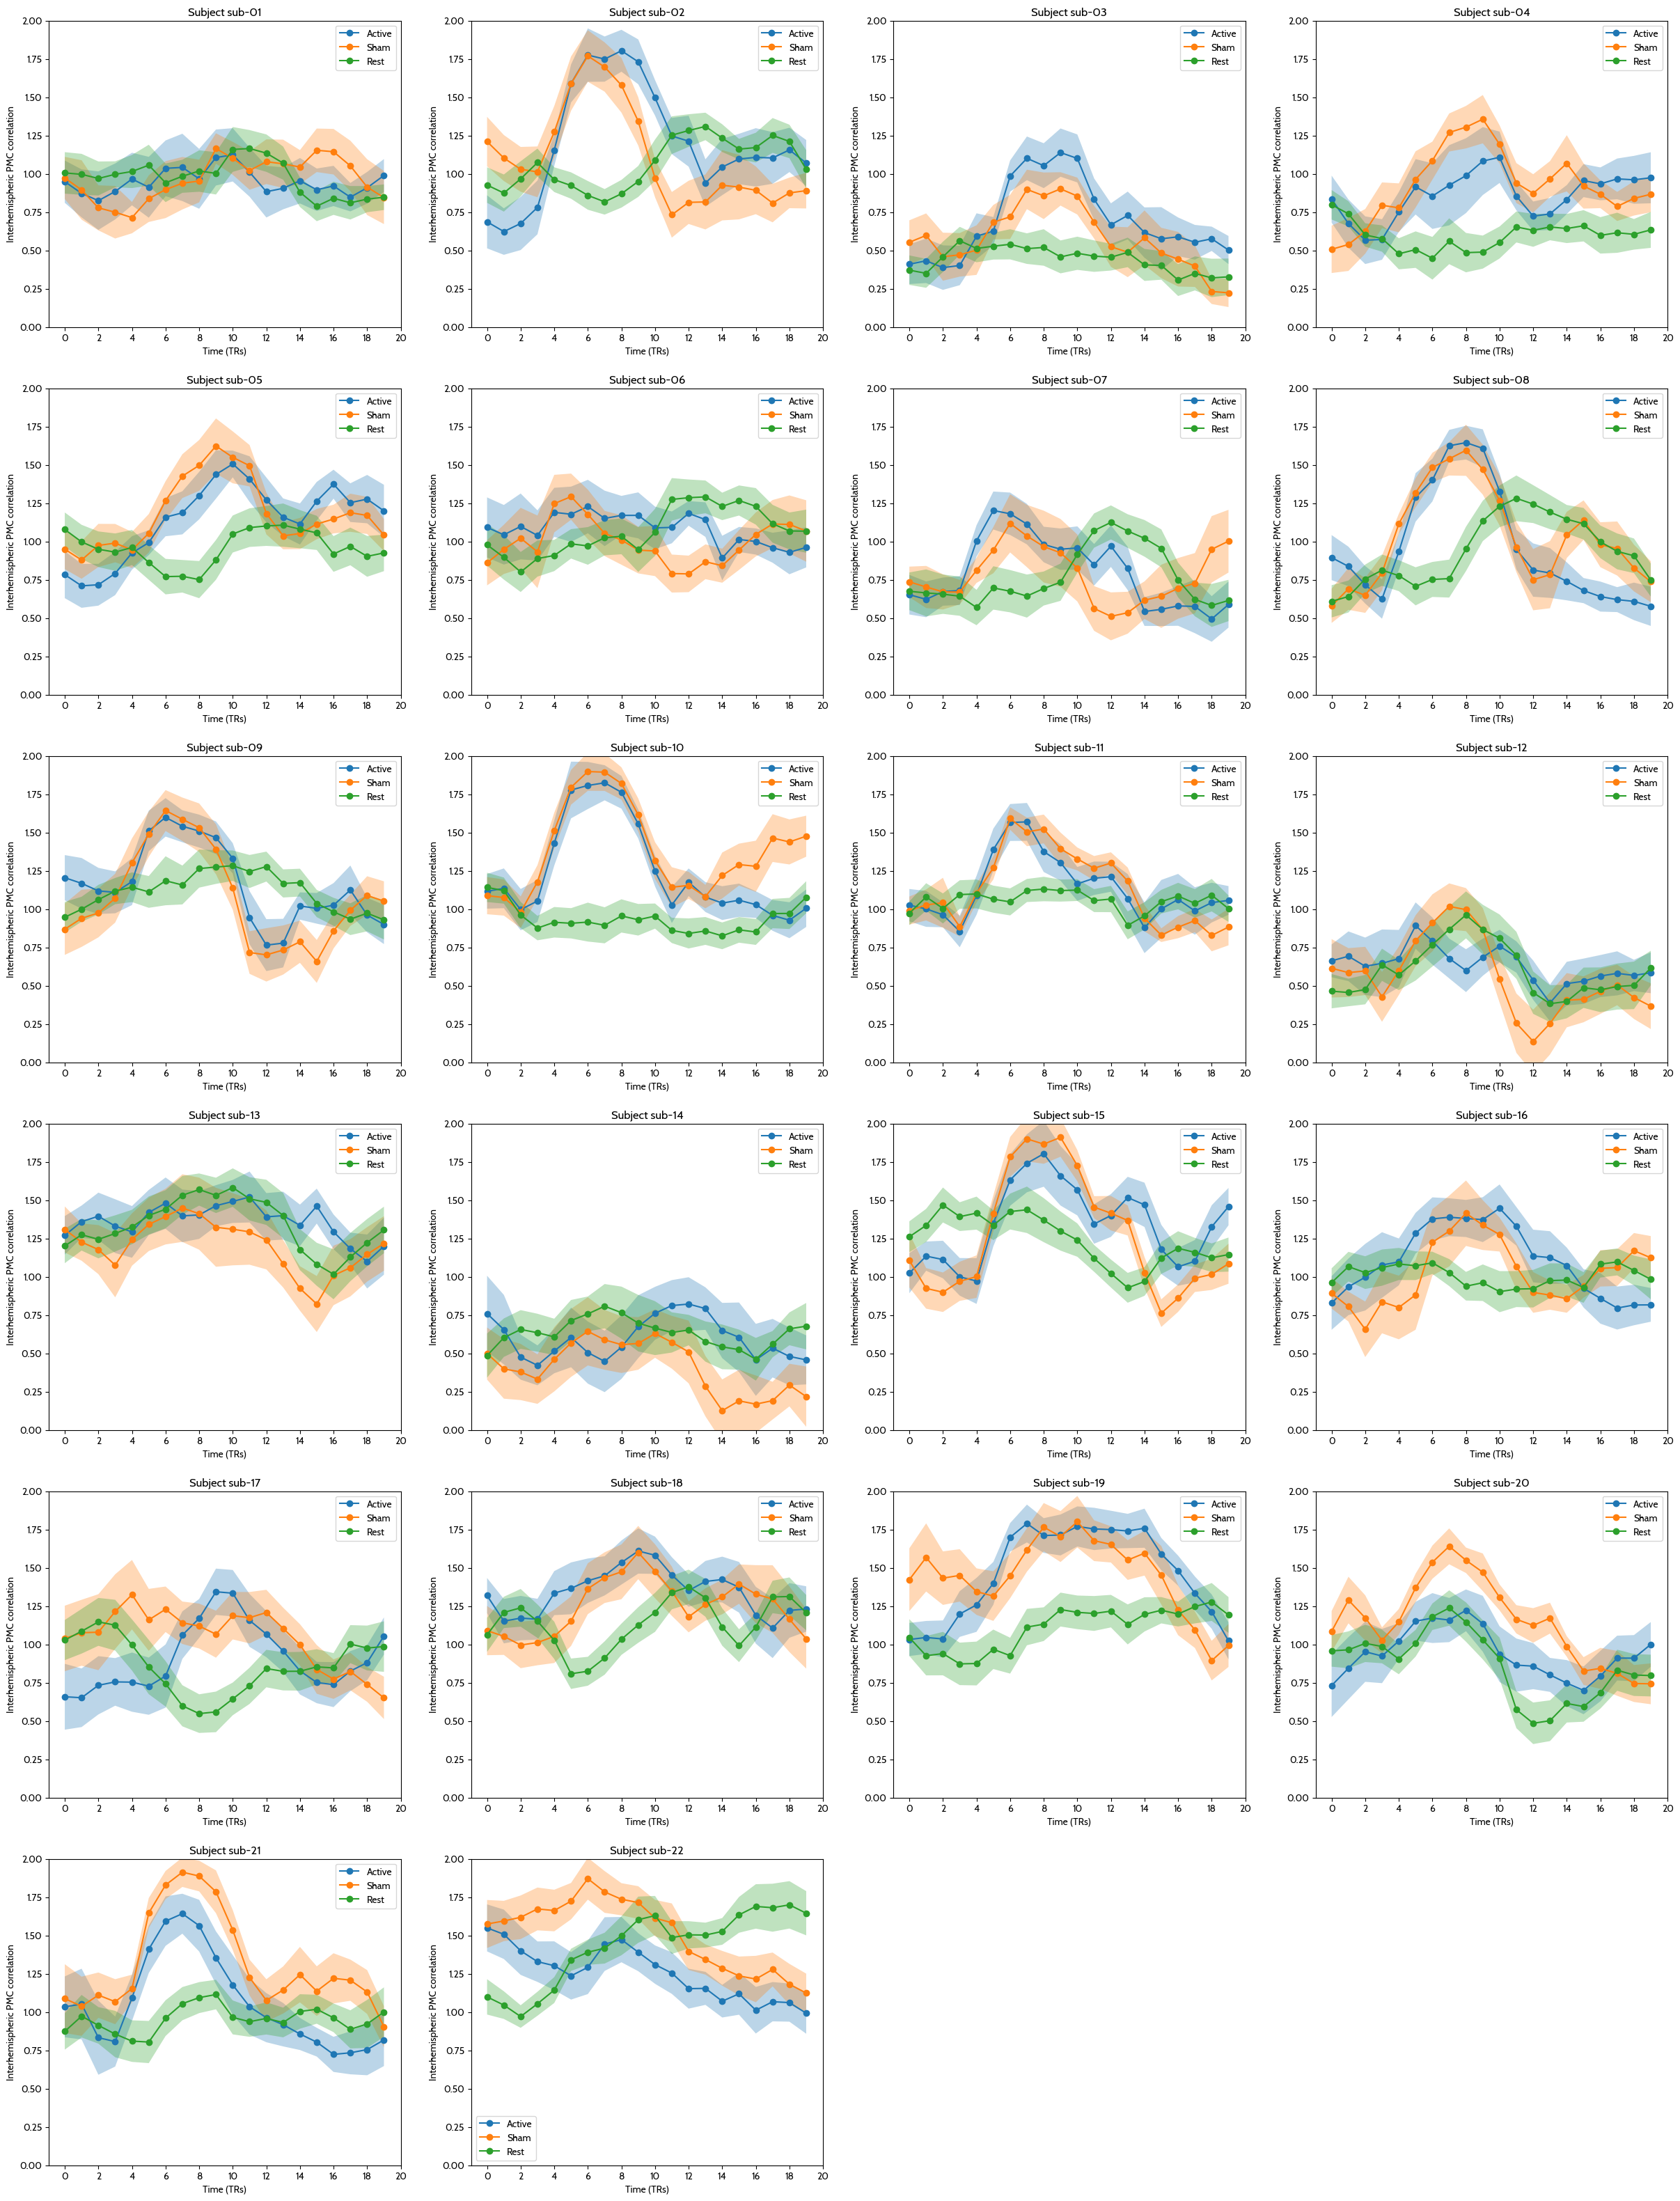

In [20]:
#| label: fig-tbv-correlation-timecourses
# Let's draw the time course of the correlation values for each participant in a single plot (subplots)
fig, axs = plt.subplots(6, 4, figsize=(30, 40))

for i, sub in enumerate(df['sub'].unique()):

    active_tcs = df[(df['sub'] == sub) & (df['feedback'] == 'active')]['correlation_tc']
    sham_tcs = df[(df['sub'] == sub) & (df['feedback'] == 'sham')]['correlation_tc']
    rest_tcs = df[(df['sub'] == sub) & (df['feedback'] == 'rest')]['correlation_tc']

    active_tc_mean = np.nanmean(np.stack(active_tcs), axis=0)
    active_tc_std = np.nanstd(np.stack(active_tcs), axis=0) / np.sqrt(len(active_tcs))

    sham_tc_mean = np.nanmean(np.stack(sham_tcs), axis=0)
    sham_tc_std = np.nanstd(np.stack(sham_tcs), axis=0) / np.sqrt(len(sham_tcs))

    rest_tc_mean = np.nanmean(np.stack(rest_tcs), axis=0)
    rest_tc_std = np.nanstd(np.stack(rest_tcs), axis=0) / np.sqrt(len(rest_tcs))

    # squeeze
    active_tc_mean = np.squeeze(active_tc_mean)
    active_tc_std = np.squeeze(active_tc_std)
    sham_tc_mean = np.squeeze(sham_tc_mean)
    sham_tc_std = np.squeeze(sham_tc_std)
    rest_tc_mean = np.squeeze(rest_tc_mean)
    rest_tc_std = np.squeeze(rest_tc_std)

    axs[i // 4, i % 4].plot(active_tc_mean, label='Active', marker='o')
    axs[i // 4, i % 4].plot(sham_tc_mean, label='Sham', marker='o')
    axs[i // 4, i % 4].plot(rest_tc_mean, label='Rest', marker='o')
    axs[i // 4, i % 4].set_ylim(0, 2)
    axs[i // 4, i % 4].set_title(f'Subject {sub}')
    axs[i // 4, i % 4].legend()
    axs[i // 4, i % 4].set_xlabel('Time (TRs)')
    axs[i // 4, i % 4].set_ylabel('Interhemispheric PMC correlation')
    axs[i // 4, i % 4].fill_between(np.arange(len(active_tc_mean)), active_tc_mean - active_tc_std, active_tc_mean + active_tc_std, alpha=0.3)
    axs[i // 4, i % 4].fill_between(np.arange(len(sham_tc_mean)), sham_tc_mean - sham_tc_std, sham_tc_mean + sham_tc_std, alpha=0.3)
    axs[i // 4, i % 4].fill_between(np.arange(len(rest_tc_mean)), rest_tc_mean - rest_tc_std, rest_tc_mean + rest_tc_std, alpha=0.3)
    axs[i // 4, i % 4].set_xticks(range(0,21,2))

# hide the last three subplots
axs[5, 2].axis('off')
axs[5, 3].axis('off')

plt.show()

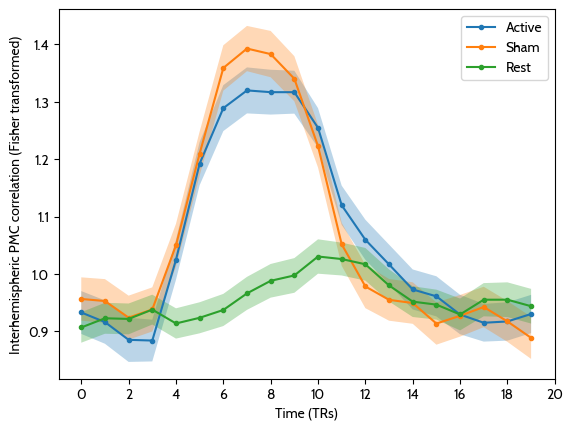

In [11]:
#| label: fig-tbv-correlation-timecourses-average
# Let's draw a time course for the correlation values

# get all the active TCs
active_tcs = df[df['feedback'] == 'active']['correlation_tc']

# average across subjects for each timepoint
active_tc_mean = np.nanmean(np.stack(active_tcs), axis=0)
active_tc_std = np.nanstd(np.stack(active_tcs), axis=0)

# get all the sham TCs
sham_tcs = df[df['feedback'] == 'sham']['correlation_tc']

# average across subjects for each timepoint
sham_tc_mean = np.nanmean(np.stack(sham_tcs), axis=0)
sham_tc_std = np.nanstd(np.stack(sham_tcs), axis=0)

# get all the rest TCs
rest_tcs = df[df['feedback'] == 'rest']['correlation_tc']

# average across subjects for each timepoint
rest_tc_mean = np.nanmean(np.stack(rest_tcs), axis=0)
rest_tc_std = np.nanstd(np.stack(rest_tcs), axis=0)

# Ensure 1-dimensional arrays
active_tc_mean = np.squeeze(active_tc_mean)
active_tc_std = np.squeeze(active_tc_std) / np.sqrt(len(active_tcs))
sham_tc_mean = np.squeeze(sham_tc_mean)
sham_tc_std = np.squeeze(sham_tc_std) / np.sqrt(len(sham_tcs))
rest_tc_mean = np.squeeze(rest_tc_mean)
rest_tc_std = np.squeeze(rest_tc_std) / np.sqrt(len(rest_tcs))

# plot the two time courses with error bars
plt.plot(active_tc_mean, label='Active', marker='o', markersize=3)
plt.plot(sham_tc_mean, label='Sham', marker='o', markersize=3)
plt.plot(rest_tc_mean, label='Rest', marker='o', markersize=3)
plt.fill_between(np.arange(len(active_tc_mean)), active_tc_mean - active_tc_std, active_tc_mean + active_tc_std, alpha=0.3)
plt.fill_between(np.arange(len(sham_tc_mean)), sham_tc_mean - sham_tc_std, sham_tc_mean + sham_tc_std, alpha=0.3)
plt.fill_between(np.arange(len(rest_tc_mean)), rest_tc_mean - rest_tc_std, rest_tc_mean + rest_tc_std, alpha=0.3)
plt.legend()
plt.xlabel('Time (TRs)')
plt.ylabel('Interhemispheric PMC correlation (Fisher transformed)')
#plt.ylim(0.5, 0.9)
plt.xticks(range(0,21,2))
plt.show()

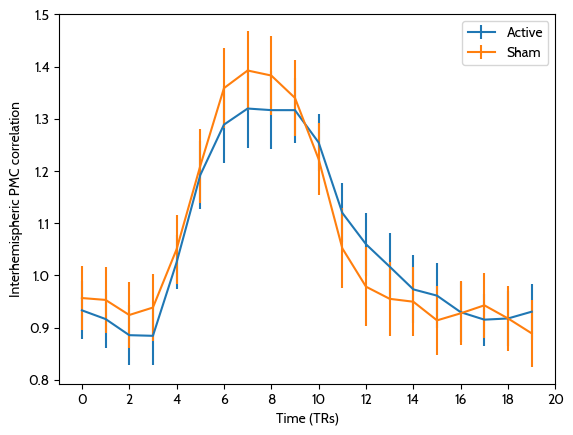

array([0.52351093, 1.        , 0.46277761, 0.27562666, 0.52351093,
       0.97462177, 0.23476219, 0.24789906, 0.11287165, 0.72618389,
       0.42448854, 0.27562666, 0.15597057, 0.19821882, 0.8736043 ,
       0.42448854, 0.77452898, 0.67886305, 0.89873552, 0.29022312])

In [12]:
# get df for active
df_active = df[df['feedback'] == 'active']
df_sham = df[df['feedback'] == 'sham']

# average correlation time courses for each subject
TC_active = np.zeros((len(df_active['sub'].unique()), 20))
TC_sham = np.zeros((len(df_active['sub'].unique()), 20))

for ss, sub in enumerate(df_active['sub'].unique()):
   tc_sub = df_active[df_active['sub'] == sub]['correlation_tc']
   tc_sub = np.stack(tc_sub)
   tc_sub_mean = np.squeeze(np.nanmean(tc_sub, axis=0))
   TC_active[ss, :] = tc_sub_mean
   
   tc_sub = df_sham[df_sham['sub'] == sub]['correlation_tc']
   tc_sub = np.stack(tc_sub)
   tc_sub_mean = np.squeeze(np.nanmean(tc_sub, axis=0))
   TC_sham[ss, :] = tc_sub_mean

# Plot both TCs with standard error
plt.errorbar(range(20), np.nanmean(TC_active, axis=0), yerr=np.nanstd(TC_active, axis=0) / np.sqrt(len(TC_active)), label='Active')
plt.errorbar(range(20), np.nanmean(TC_sham, axis=0), yerr=np.nanstd(TC_sham, axis=0) / np.sqrt(len(TC_sham)), label='Sham')
plt.legend()
plt.xlabel('Time (TRs)')
plt.ylabel('Interhemispheric PMC correlation')
plt.xticks(range(0,21,2))
plt.show()

# non parametric statistical test between active and sham per timepoint
from scipy.stats import wilcoxon

p_values = np.zeros(20)
for ii in range(20):
    p_values[ii] = wilcoxon(TC_active[:, ii], TC_sham[:, ii])[1]

p_values   

